<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/141_DOE_Python_y_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **El Problema a Resolver - Un diseño $3^3$**

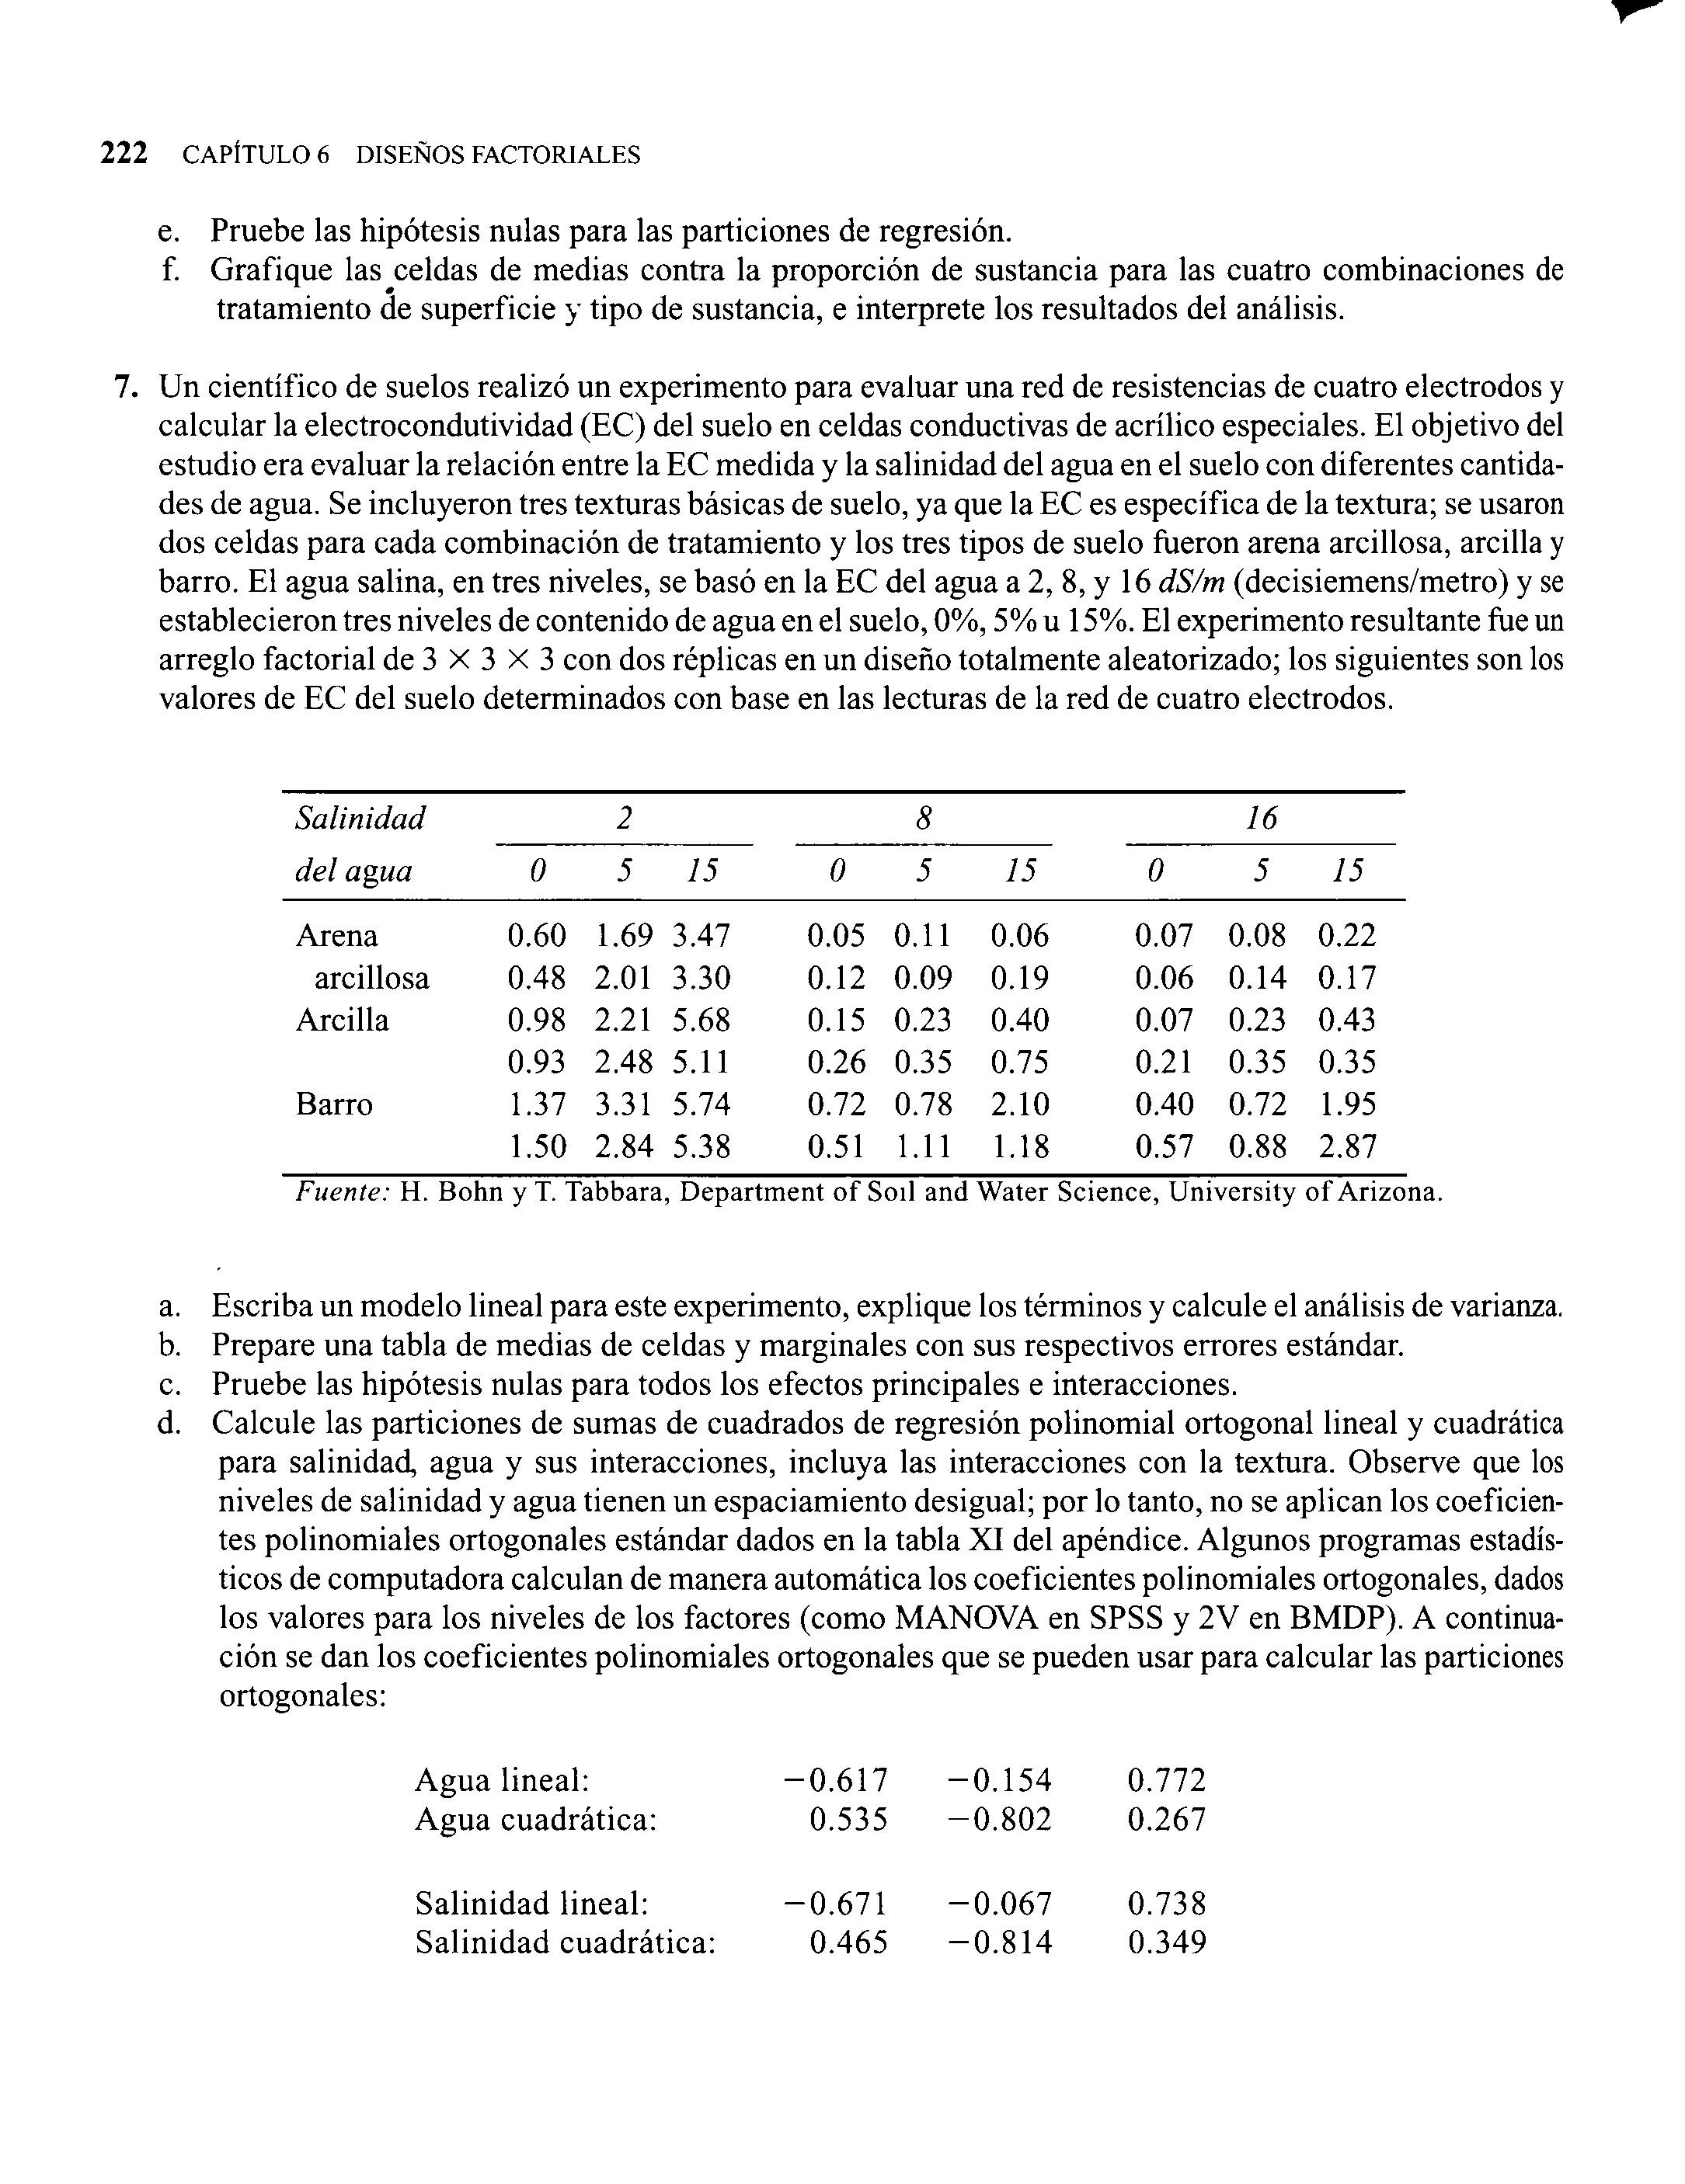

# **Parte I: Solución Usando - Python para el Diseño Factorial con Tres Factores y tres niveles $3^3$**
## **1. Nuestras librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
!pip install bioinfokit &>/dev/null
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot

## **2. Importando una base de datos a Python**

In [2]:
import pandas as pd

# Datos
# A = SUELOS
# B = EC_AGUA
# C = P_AGUA
# f = Electro_C

# Crear un diccionario con los datos
data = {
    'A': ['ARENA'] * 18 + ['ARCILLA'] * 18 + ['BARRO'] * 18,
    'B': ['2'] * 6 + ['8'] * 6 + ['16'] * 6 +
               ['2'] * 6 + ['8'] * 6 + ['16'] * 6 +
               ['2'] * 6 + ['8'] * 6 + ['16'] * 6,
    'C': ['0', '0', '5', '5', '15', '15'] * 9,
    'f': [
        0.60, 0.48, 1.69, 2.01, 3.47, 3.30, 0.05, 0.12, 0.11, 0.09, 0.06, 0.19,
        0.07, 0.06, 0.08, 0.14, 0.22, 0.17, 0.98, 0.93, 2.21, 2.48, 5.68, 5.11,
        0.15, 0.26, 0.23, 0.35, 0.40, 0.75, 0.07, 0.21, 0.23, 0.35, 0.43, 0.35,
        1.37, 1.50, 3.31, 2.84, 5.74, 5.38, 0.72, 0.51, 0.78, 1.11, 2.10, 1.18,
        0.40, 0.57, 0.72, 0.88, 1.95, 2.87
    ]
}

# Crear el DataFrame
datos = pd.DataFrame(data)

# Mostrar el DataFrame
print(datos)


          A   B   C     f
0     ARENA   2   0  0.60
1     ARENA   2   0  0.48
2     ARENA   2   5  1.69
3     ARENA   2   5  2.01
4     ARENA   2  15  3.47
5     ARENA   2  15  3.30
6     ARENA   8   0  0.05
7     ARENA   8   0  0.12
8     ARENA   8   5  0.11
9     ARENA   8   5  0.09
10    ARENA   8  15  0.06
11    ARENA   8  15  0.19
12    ARENA  16   0  0.07
13    ARENA  16   0  0.06
14    ARENA  16   5  0.08
15    ARENA  16   5  0.14
16    ARENA  16  15  0.22
17    ARENA  16  15  0.17
18  ARCILLA   2   0  0.98
19  ARCILLA   2   0  0.93
20  ARCILLA   2   5  2.21
21  ARCILLA   2   5  2.48
22  ARCILLA   2  15  5.68
23  ARCILLA   2  15  5.11
24  ARCILLA   8   0  0.15
25  ARCILLA   8   0  0.26
26  ARCILLA   8   5  0.23
27  ARCILLA   8   5  0.35
28  ARCILLA   8  15  0.40
29  ARCILLA   8  15  0.75
30  ARCILLA  16   0  0.07
31  ARCILLA  16   0  0.21
32  ARCILLA  16   5  0.23
33  ARCILLA  16   5  0.35
34  ARCILLA  16  15  0.43
35  ARCILLA  16  15  0.35
36    BARRO   2   0  1.37
37    BARRO 

In [3]:
datos.head()

,A,B,C,f
0,ARENA,2,0,0.60
1,ARENA,2,0,0.48
2,ARENA,2,5,1.69
3,ARENA,2,5,2.01
4,ARENA,2,15,3.47


In [4]:
datos.columns

Index(['A', 'B', 'C', 'f'], dtype='object')

## **3. Diagrama de caja y Bigotes para cada factor**

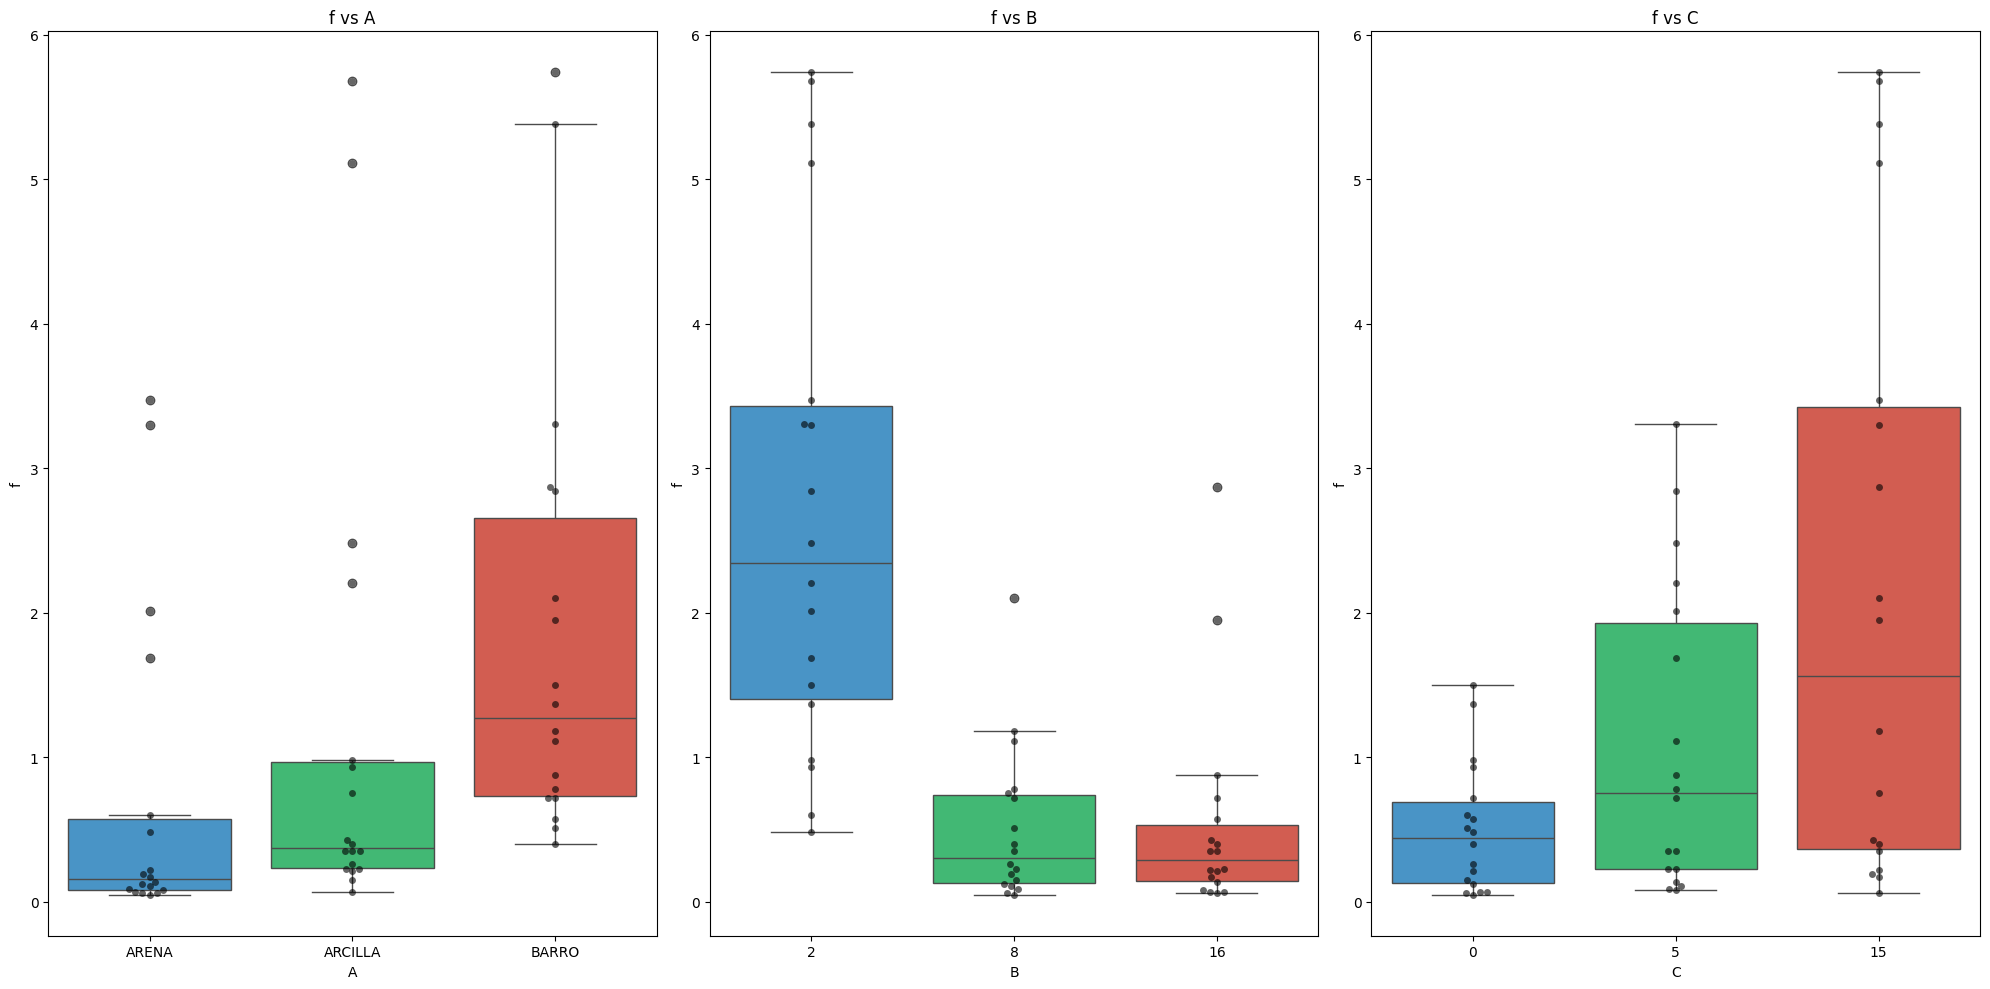

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definimos la paleta de colores
colors = ['#3498db', '#2ecc71', '#e74c3c']

# Creamos el gráfico
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Gráfico para f vs A
axs[0].set_title('f vs A')
sns.boxplot(x="A", y="f", data=datos, ax=axs[0], hue="A", palette=colors, legend=False)
sns.swarmplot(x="A", y="f", data=datos, color='black', alpha=0.6, ax=axs[0])

# Gráfico para f vs B
axs[1].set_title('f vs B')
sns.boxplot(x="B", y="f", data=datos, ax=axs[1], hue="B", palette=colors, legend=False)
sns.swarmplot(x="B", y="f", data=datos, color='black', alpha=0.6, ax=axs[1])

# Gráfico para f vs C
axs[2].set_title('f vs C')
sns.boxplot(x="C", y="f", data=datos, ax=axs[2], hue="C", palette=colors, legend=False)
sns.swarmplot(x="C", y="f", data=datos, color='black', alpha=0.6, ax=axs[2])

# Ajustamos el espacio entre gráficos
plt.tight_layout()

# Mostramos el gráfico
plt.show()


## **4. Diagrama de caja y Bigotes Bidimensional**

<Axes: title={'center': 'f vs B y C'}, xlabel='B', ylabel='f'>

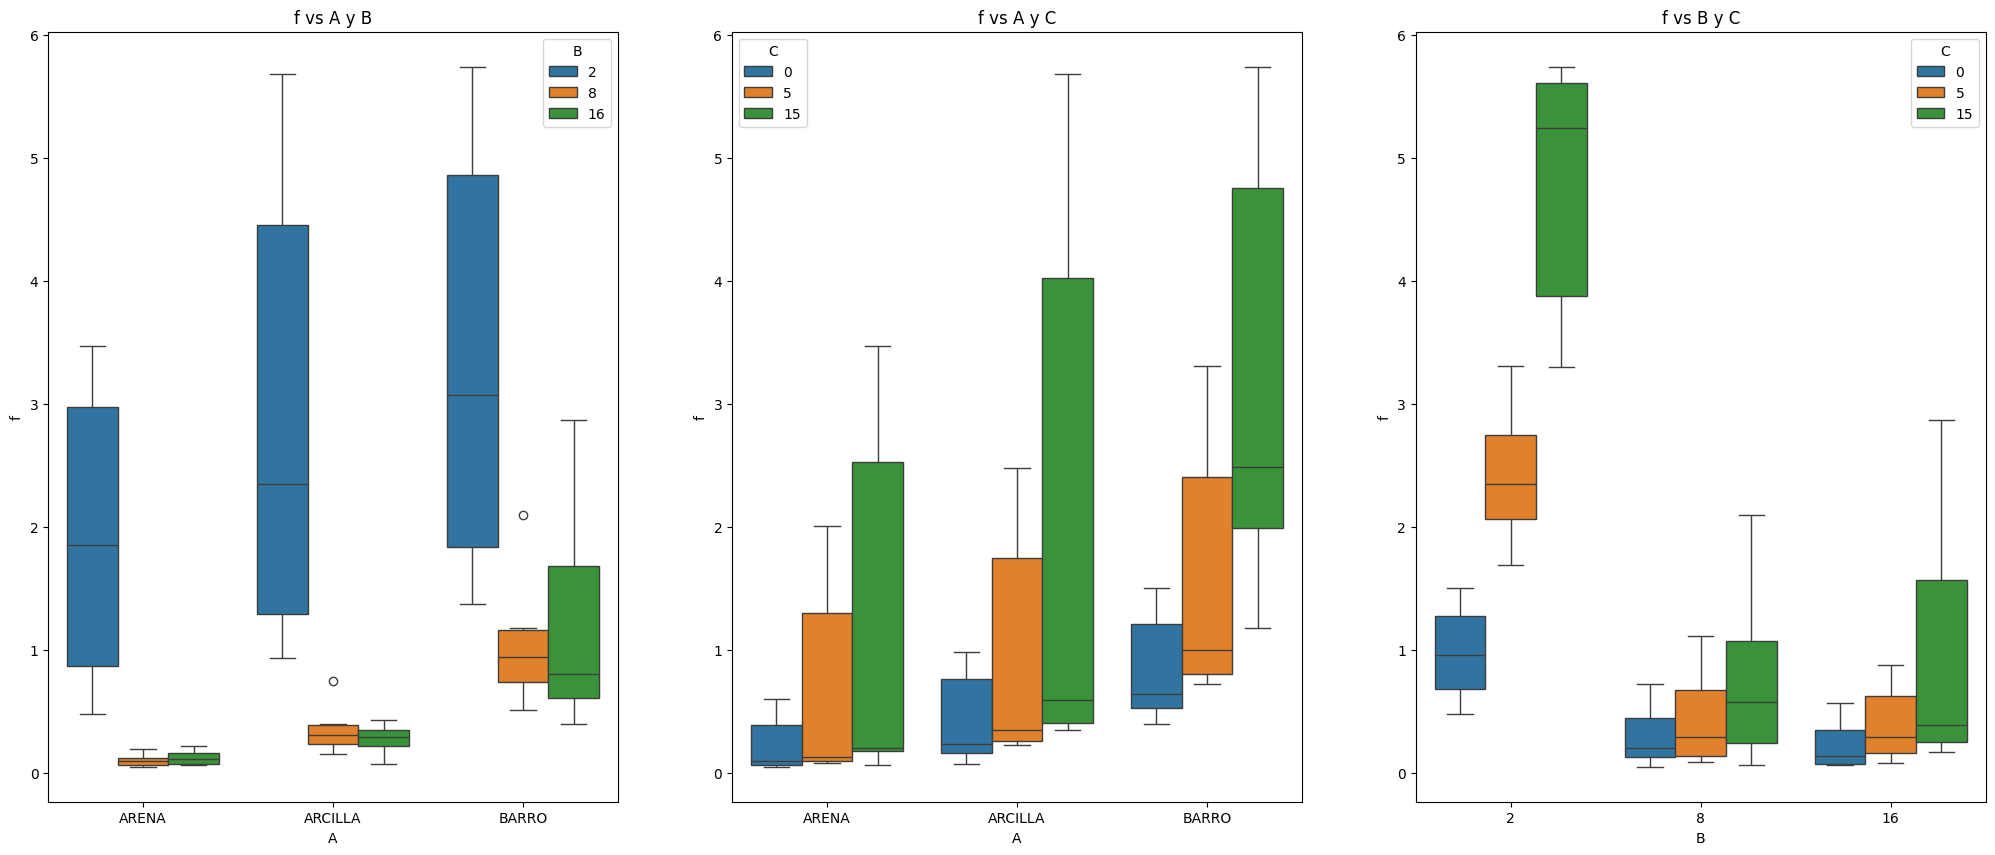

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10))
axs[0].set_title('f vs A y B')
sns.boxplot(x="A", y="f", hue = "B", data=datos, ax=axs[0]);
axs[1].set_title('f vs A y C')
sns.boxplot(x="A", y="f", hue = "C", data=datos, ax=axs[1])
axs[2].set_title('f vs B y C');
sns.boxplot(x="B", y="f", hue = "C", data=datos, ax=axs[2])

# **4. Descriptores Numéricos**

### **Para el Factor A**

In [8]:
print('f media y desviación típica para A')
datos.groupby('A')['f'].agg(['mean', 'std'])


f media y desviación típica para A


,mean,std
A,,
ARCILLA,1.176111,1.677811
ARENA,0.717222,1.120577
BARRO,1.885000,1.596339


In [9]:
import pandas as pd

# Calcular la media, la desviación estándar y el coeficiente de variación
fac_A = datos.groupby('A')['f'].agg(['mean', 'std'])
fac_A['cv_A'] = (fac_A['std'] / fac_A['mean']) * 100

fac_A


,mean,std,cv_A
A,,,
ARCILLA,1.176111,1.677811,142.657498
ARENA,0.717222,1.120577,156.238405
BARRO,1.885000,1.596339,84.686400


### **Para el Factor B**

In [10]:
import pandas as pd

# Calcular la media, la desviación estándar y el coeficiente de variación
fac_B = datos.groupby('B')['f'].agg(['mean', 'std'])
fac_B['cv_B'] = (fac_B['std'] / fac_B['mean']) * 100

fac_B


,mean,std,cv_B
B,,,
16,0.542778,0.733956,135.222243
2,2.726667,1.763479,64.675276
8,0.508889,0.532739,104.686632


### **Para el Factor C**

In [11]:
import pandas as pd

# Calcular la media, la desviación estándar y el coeficiente de variación
fac_C = datos.groupby('C')['f'].agg(['mean', 'std'])
fac_C['cv_C'] = (fac_C['std'] / fac_C['mean']) * 100

fac_C


,mean,std,cv_C
C,,,
0,0.502778,0.448551,89.214500
15,2.186111,2.116638,96.822049
5,1.089444,1.060485,97.341844


# **5. Media y desviación estandard para toda la base de datos**

In [12]:
print('f media y desviación típica para B')
datos.groupby(['A', 'B', 'C'])['f'].agg(['mean', 'std'])

f media y desviación típica para B


mean       std
A       B  C                  
ARCILLA 16 0   0.140  0.098995
           15  0.390  0.056569
           5   0.290  0.084853
        2  0   0.955  0.035355
           15  5.395  0.403051
           5   2.345  0.190919
        8  0   0.205  0.077782
           15  0.575  0.247487
           5   0.290  0.084853
ARENA   16 0   0.065  0.007071
           15  0.195  0.035355
           5   0.110  0.042426
        2  0   0.540  0.084853
           15  3.385  0.120208
           5   1.850  0.226274
        8  0   0.085  0.049497
           15  0.125  0.091924
           5   0.100  0.014142
BARRO   16 0   0.485  0.120208
           15  2.410  0.650538
           5   0.800  0.113137
        2  0   1.435  0.091924
           15  5.560  0.254558
           5   3.075  0.332340
        8  0   0.615  0.148492
           15  1.640  0.650538
           5   0.945  0.233345

# **6. Diagramas de interacción**

## **a. Interacción entre el SUELO (A) y EC_AGUA (B)**


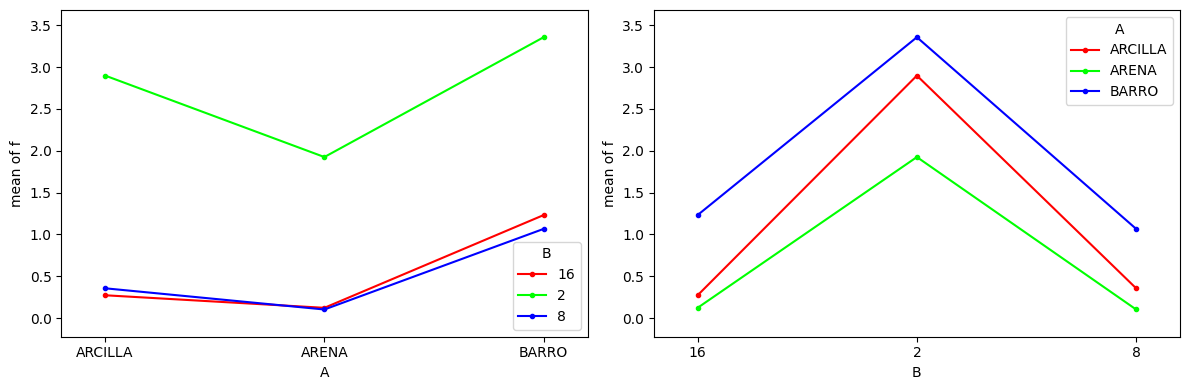

In [16]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

# Crear dos gráficos en una fila
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # ncols=2 para dos gráficos en una fila

# Primer gráfico
interaction_plot(
    x        = datos.A,
    trace    = datos.B,
    response = datos.f,
    ax       = axes[0],  # Primer eje
)

# Segundo gráfico
interaction_plot(
    x        = datos.B,
    trace    = datos.A,
    response = datos.f,
    ax       = axes[1],  # Segundo eje
)

# Mostrar los gráficos
plt.tight_layout()
plt.show()


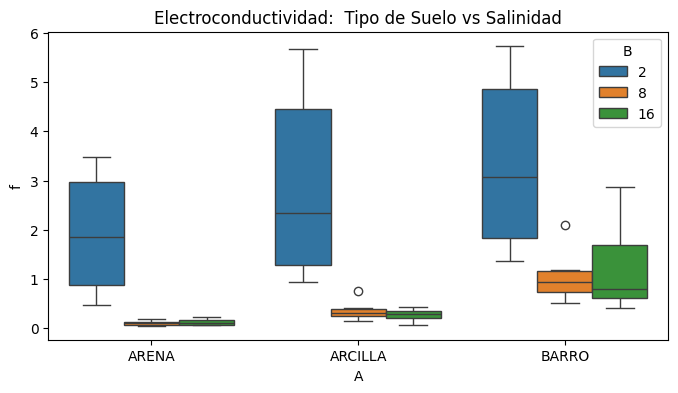

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Electroconductividad:  Tipo de Suelo vs Salinidad')
sns.boxplot(x="A", y="f", hue='B', data=datos, ax=ax);

## **b. Interacción entre el SUELO (A) y P_AGUA (C)**


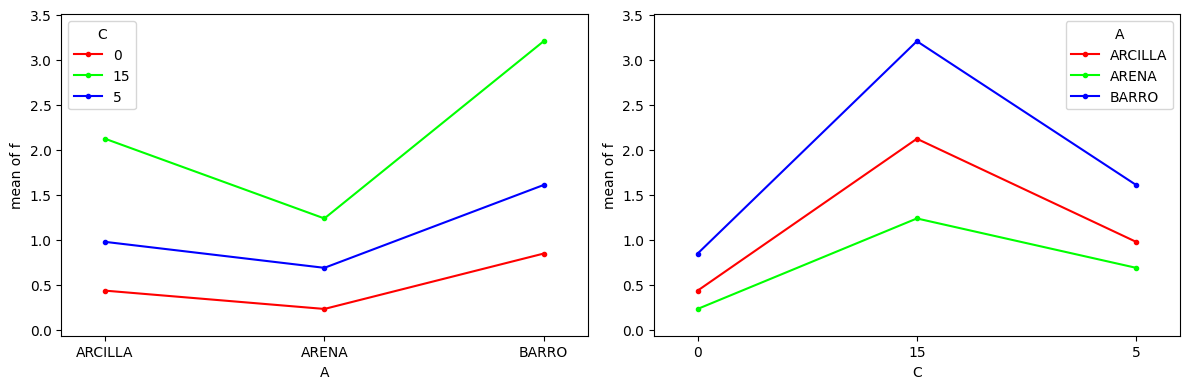

In [39]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

# Crear dos gráficos en una fila
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # ncols=2 para dos gráficos en una fila

# Primer gráfico
interaction_plot(
    x        = datos.A,
    trace    = datos.C,
    response = datos.f,
    ax       = axes[0],  # Primer eje
)

# Segundo gráfico
interaction_plot(
    x        = datos.C,
    trace    = datos.A,
    response = datos.f,
    ax       = axes[1],  # Segundo eje
)

# Mostrar los gráficos
plt.tight_layout()
plt.show()


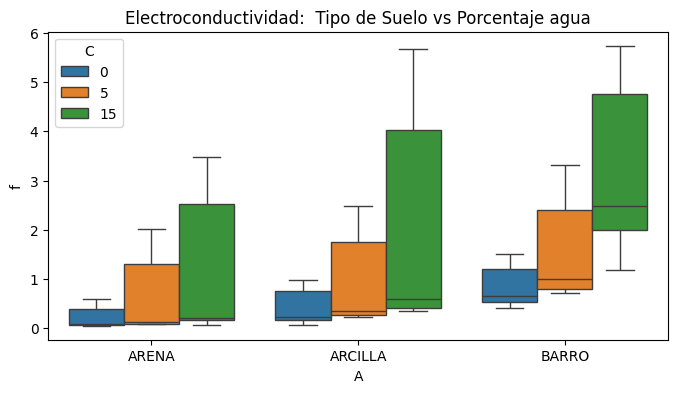

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Electroconductividad:  Tipo de Suelo vs Porcentaje agua')
sns.boxplot(x="A", y="f", hue='C', data=datos, ax=ax);

## **c. Interacción entre el EC_AGUA (B) y P_AGUA (C)**

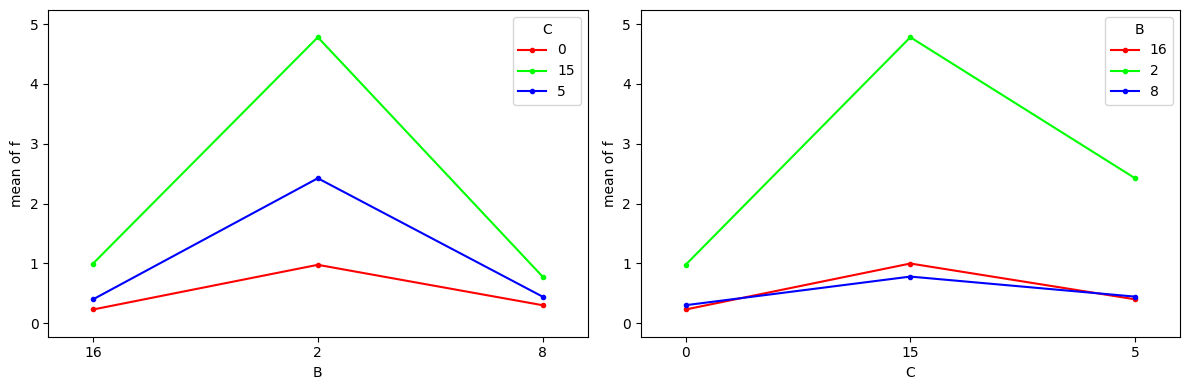

In [40]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

# Crear dos gráficos en una fila
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # ncols=2 para dos gráficos en una fila

# Primer gráfico
interaction_plot(
    x        = datos.B,
    trace    = datos.C,
    response = datos.f,
    ax       = axes[0],  # Primer eje
)

# Segundo gráfico
interaction_plot(
    x        = datos.C,
    trace    = datos.B,
    response = datos.f,
    ax       = axes[1],  # Segundo eje
)

# Mostrar los gráficos
plt.tight_layout()
plt.show()


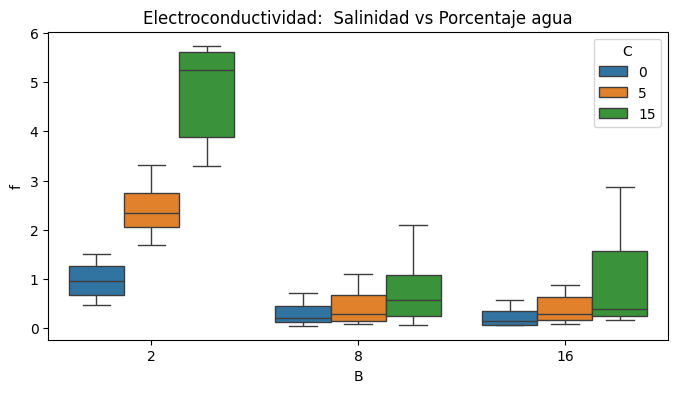

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Electroconductividad:  Salinidad vs Porcentaje agua')
sns.boxplot(x="B", y="f", hue='C', data=datos, ax=ax);

# **8. Anova usando StatModels**

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model2 = ols('f ~ A*B*C',                 # Model formula
            data = datos).fit()

anova_result = sm.stats.anova_lm(model2, typ=2)
print (anova_result)

             sum_sq    df           F        PR(>F)
A         12.460844   2.0  110.982286  9.452657e-14
B         58.134344   2.0  517.772489  2.935770e-22
C         26.282800   2.0  234.087284  8.793735e-18
A:B        1.284578   4.0    5.720534  1.811545e-03
A:C        3.036656   4.0   13.522959  3.568131e-06
B:C       20.618956   4.0   91.821178  2.586627e-15
A:B:C      1.650556   8.0    3.675161  5.098099e-03
Residual   1.515750  27.0         NaN           NaN


In [15]:
print(round(anova_result,3))

          sum_sq    df        F  PR(>F)
A         12.461   2.0  110.982   0.000
B         58.134   2.0  517.772   0.000
C         26.283   2.0  234.087   0.000
A:B        1.285   4.0    5.721   0.002
A:C        3.037   4.0   13.523   0.000
B:C       20.619   4.0   91.821   0.000
A:B:C      1.651   8.0    3.675   0.005
Residual   1.516  27.0      NaN     NaN


# **9. Método de comparaciones múltiples**

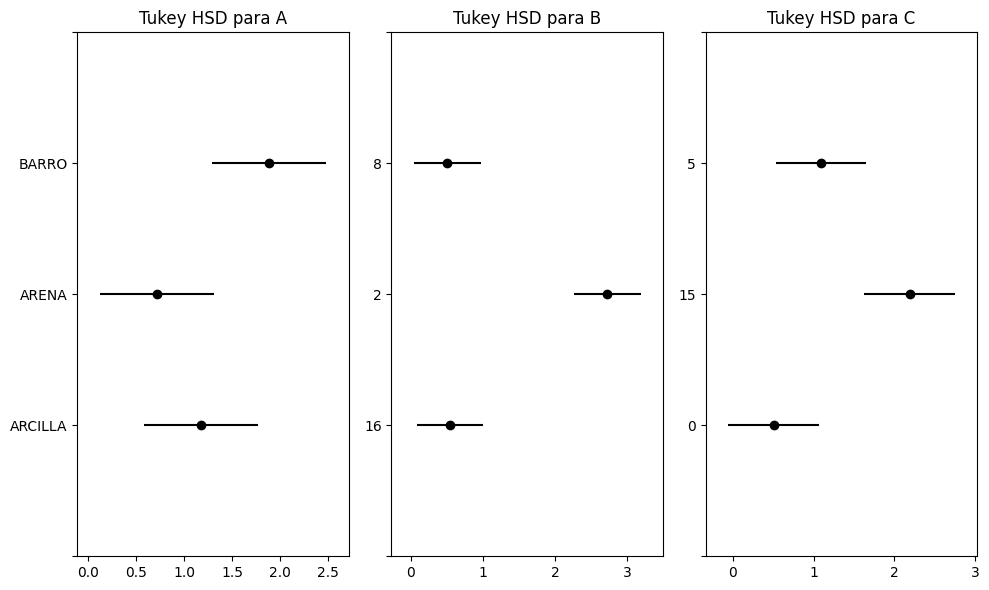

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizar Tukey HSD para el factor A
tukey_A = pairwise_tukeyhsd(endog=datos['f'], groups=datos['A'], alpha=0.05)

# Realizar Tukey HSD para el factor B
tukey_B = pairwise_tukeyhsd(endog=datos['f'], groups=datos['B'], alpha=0.05)

# Realizar Tukey HSD para el factor C
tukey_C = pairwise_tukeyhsd(endog=datos['f'], groups=datos['C'], alpha=0.05)

# Crear una figura para los gráficos de Tukey
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Graficar Tukey HSD para el factor A
tukey_A.plot_simultaneous(ax=axes[0])
axes[0].set_title("Tukey HSD para A")

# Graficar Tukey HSD para el factor B
tukey_B.plot_simultaneous(ax=axes[1])
axes[1].set_title("Tukey HSD para B")

# Graficar Tukey HSD para el factor C
tukey_C.plot_simultaneous(ax=axes[2])
axes[2].set_title("Tukey HSD para C")

# Ajustar los gráficos
plt.tight_layout()
plt.show()


# **Usando R**

## **1. Acomodamos a Colab para recibir a R**

In [20]:
%load_ext rpy2.ipython

## **2. Eliminamos losmensajes cuando instalemos un programa de R en Colab**

In [21]:
import logging
logging.getLogger('rpy2').setLevel(logging.ERROR)

## **3. Instalamos nuestros paquetes de uso en R**

In [22]:
%%R
install.packages("gridExtra")
install.packages("ggplot2")
library(gridExtra)
library(ggplot2)

## **4. Nuestro dataframe en R**

In [23]:
%%R
Electro_C = c(0.60,0.48,1.69,2.01,3.47,3.30,0.05,0.12,0.11,0.09,0.06,0.19,
0.07,0.06,0.08,0.14,0.22, 0.17,0.98,0.93,2.21,2.48,5.68,5.11,0.15,0.26,
0.23,0.35,0.40,0.75,0.07,0.21,0.23,0.35,0.43,0.35,1.37,1.50,3.31,2.84,5.74,
5.38,0.72,0.51,0.78,1.11,2.10,1.18,0.40,0.57,0.72,0.88,1.95,2.87)
SUELOS =factor( c(rep("ARENA",18),
                rep("ARCILLA",18),
                rep("BARRO",18)))
EC_AGUA = factor(c(rep("2",6),
                    rep("8",6),
                    rep("16",6)))
P_AGUA = factor(c(rep("0",2),
                    rep("5",2),
                    rep("15",2)))


In [24]:
%%R
D3F = data.frame(SUELOS,EC_AGUA, P_AGUA,Electro_C)

D3F

    SUELOS EC_AGUA P_AGUA Electro_C
1    ARENA       2      0      0.60
2    ARENA       2      0      0.48
3    ARENA       2      5      1.69
4    ARENA       2      5      2.01
5    ARENA       2     15      3.47
6    ARENA       2     15      3.30
7    ARENA       8      0      0.05
8    ARENA       8      0      0.12
9    ARENA       8      5      0.11
10   ARENA       8      5      0.09
11   ARENA       8     15      0.06
12   ARENA       8     15      0.19
13   ARENA      16      0      0.07
14   ARENA      16      0      0.06
15   ARENA      16      5      0.08
16   ARENA      16      5      0.14
17   ARENA      16     15      0.22
18   ARENA      16     15      0.17
19 ARCILLA       2      0      0.98
20 ARCILLA       2      0      0.93
21 ARCILLA       2      5      2.21
22 ARCILLA       2      5      2.48
23 ARCILLA       2     15      5.68
24 ARCILLA       2     15      5.11
25 ARCILLA       8      0      0.15
26 ARCILLA       8      0      0.26
27 ARCILLA       8      5   

## **5. Conociendo nuestros datos**

In [26]:
%%R
summary(D3F)

     SUELOS   EC_AGUA P_AGUA    Electro_C     
 ARCILLA:18   16:18   0 :18   Min.   :0.0500  
 ARENA  :18   2 :18   15:18   1st Qu.:0.2125  
 BARRO  :18   8 :18   5 :18   Median :0.5850  
                              Mean   :1.2594  
                              3rd Qu.:1.8850  
                              Max.   :5.7400  


## **6. Nuestro boxplot para los facores principales**

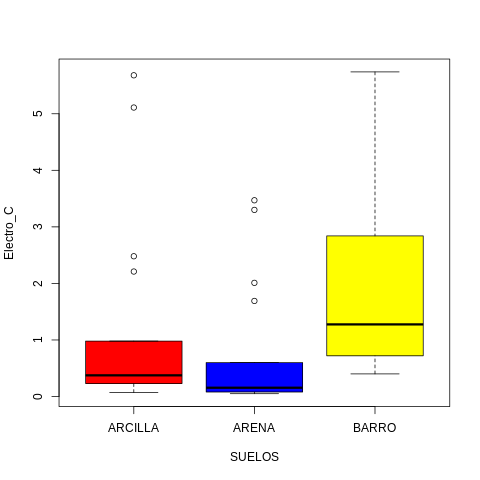

In [33]:
%%R
plot(Electro_C ~ SUELOS, data=D3F, col=c("red", "blue", "yellow"))

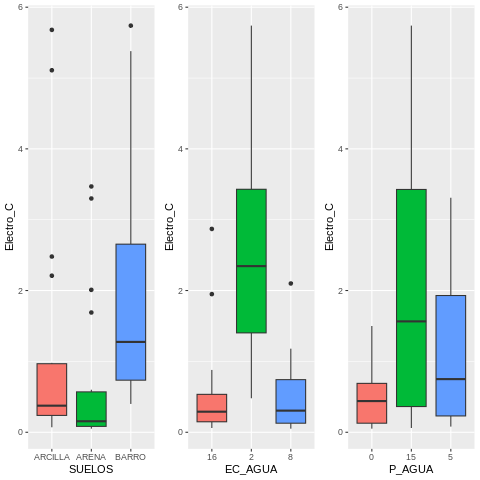

In [31]:
%%R
SUELOS2 <- ggplot(D3F, aes(x = SUELOS, y = Electro_C, fill=SUELOS)) +
  geom_boxplot() + theme(legend.position = "none")
EC_AGUA2 <- ggplot(D3F, aes(x = EC_AGUA, y = Electro_C, fill=EC_AGUA)) +
  geom_boxplot() + theme(legend.position = "none")
P_AGUA2 <- ggplot(D3F, aes(x = P_AGUA, y = Electro_C, fill=P_AGUA)) +
  geom_boxplot() + theme(legend.position = "none")
grid.arrange(SUELOS2,EC_AGUA2,P_AGUA2, nrow=1, ncol=3)

## **7. Análisis de Varianza**

### **a. Definimos el Modelo Lineal**

In [35]:
%%R
modeloD3F= lm(Electro_C ~ SUELOS*EC_AGUA*P_AGUA, D3F)


### **b. Resumen del Modelo Lineal**

In [36]:
%%R
summary(modeloD3F)



Call:
lm(formula = Electro_C ~ SUELOS * EC_AGUA * P_AGUA, data = D3F)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46000 -0.06875  0.00000  0.06875  0.46000 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     0.1400     0.1675   0.836 0.410700    
SUELOSARENA                    -0.0750     0.2369  -0.317 0.754027    
SUELOSBARRO                     0.3450     0.2369   1.456 0.156900    
EC_AGUA2                        0.8150     0.2369   3.440 0.001907 ** 
EC_AGUA8                        0.0650     0.2369   0.274 0.785915    
P_AGUA15                        0.2500     0.2369   1.055 0.300714    
P_AGUA5                         0.1500     0.2369   0.633 0.532007    
SUELOSARENA:EC_AGUA2           -0.3400     0.3351  -1.015 0.319262    
SUELOSBARRO:EC_AGUA2            0.1350     0.3351   0.403 0.690201    
SUELOSARENA:EC_AGUA8           -0.0450     0.3351  -0.134 0.894164    
SUELOSBARRO:EC_AGUA8         

### **c. El Anova del Modelo**

In [37]:
%%R
anova(modeloD3F)


Analysis of Variance Table

Response: Electro_C
                      Df Sum Sq Mean Sq  F value    Pr(>F)    
SUELOS                 2 12.461  6.2304 110.9823 9.453e-14 ***
EC_AGUA                2 58.134 29.0672 517.7725 < 2.2e-16 ***
P_AGUA                 2 26.283 13.1414 234.0873 < 2.2e-16 ***
SUELOS:EC_AGUA         4  1.285  0.3211   5.7205  0.001812 ** 
SUELOS:P_AGUA          4  3.037  0.7592  13.5230 3.568e-06 ***
EC_AGUA:P_AGUA         4 20.619  5.1547  91.8212 2.587e-15 ***
SUELOS:EC_AGUA:P_AGUA  8  1.651  0.2063   3.6752  0.005098 ** 
Residuals             27  1.516  0.0561                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### **d. Variables que contiene nuestro modelo: usando names(g)**

In [40]:
### **d. Variables que contiene nuestro modelo: usando names(g)**
%%R
names(modeloD3F)

 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "contrasts"     "xlevels"       "call"          "terms"        
[13] "model"        


# **8. Supuesto del Modelo**
## **(a) Examinando la normalidad de los datos: Gráfico QQ**

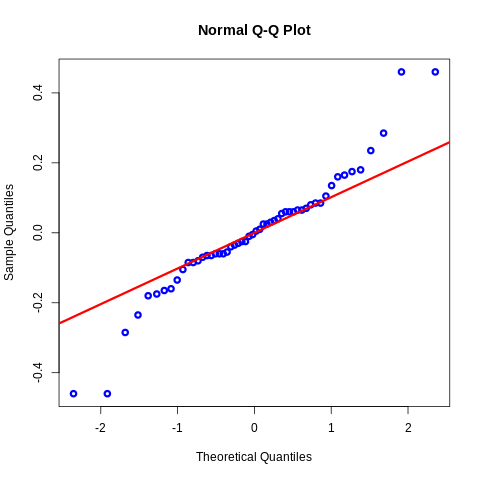

In [41]:
%%R
qqnorm(modeloD3F$residuals,col="blue", lwd=3)
qqline(modeloD3F$residuals,col="red", lwd=3)

## **(b) Examinando la Homocedasticidad de los datos: Residuos vs Predichos**

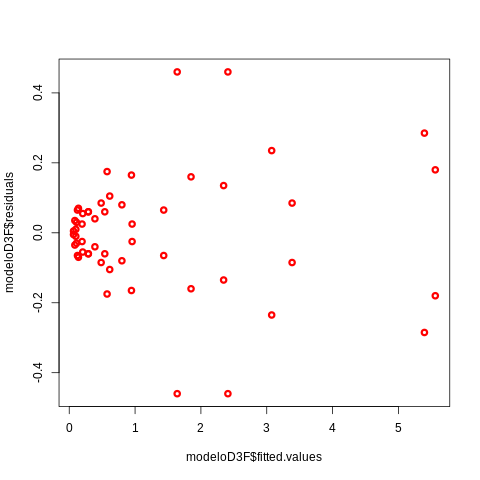

In [43]:
%%R
plot(modeloD3F$fitted.values,modeloD3F$residuals,col="red", lwd=3)

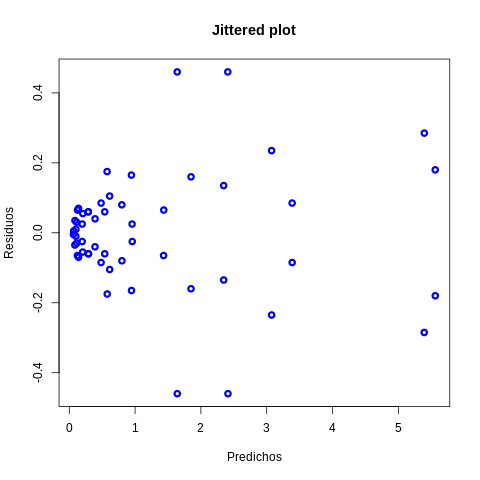

In [48]:
%%R
g = modeloD3F
plot(jitter(g$fit),g$res,xlab="Predichos",ylab="Residuos",
main="Jittered plot", col="blue", lwd=3)

# **8. Comparaciones Múltiples - D3F**

In [49]:
%%R
g = modeloD3F
summary(g)


Call:
lm(formula = Electro_C ~ SUELOS * EC_AGUA * P_AGUA, data = D3F)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46000 -0.06875  0.00000  0.06875  0.46000 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     0.1400     0.1675   0.836 0.410700    
SUELOSARENA                    -0.0750     0.2369  -0.317 0.754027    
SUELOSBARRO                     0.3450     0.2369   1.456 0.156900    
EC_AGUA2                        0.8150     0.2369   3.440 0.001907 ** 
EC_AGUA8                        0.0650     0.2369   0.274 0.785915    
P_AGUA15                        0.2500     0.2369   1.055 0.300714    
P_AGUA5                         0.1500     0.2369   0.633 0.532007    
SUELOSARENA:EC_AGUA2           -0.3400     0.3351  -1.015 0.319262    
SUELOSBARRO:EC_AGUA2            0.1350     0.3351   0.403 0.690201    
SUELOSARENA:EC_AGUA8           -0.0450     0.3351  -0.134 0.894164    
SUELOSBARRO:EC_AGUA8         

## **Tukey: Rangos múltiples**

In [55]:
%%R
h = aov( Electro_C ~ SUELOS * EC_AGUA * P_AGUA, data = D3F)
TukeyHSD(h)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Electro_C ~ SUELOS * EC_AGUA * P_AGUA, data = D3F)

$SUELOS
                    diff        lwr        upr    p adj
ARENA-ARCILLA -0.4588889 -0.6547104 -0.2630674 1.02e-05
BARRO-ARCILLA  0.7088889  0.5130674  0.9047104 0.00e+00
BARRO-ARENA    1.1677778  0.9719563  1.3635993 0.00e+00

$EC_AGUA
            diff        lwr        upr    p adj
2-16  2.18388889  1.9880674  2.3797104 0.000000
8-16 -0.03388889 -0.2297104  0.1619326 0.903854
8-2  -2.21777778 -2.4135993 -2.0219563 0.000000

$P_AGUA
           diff        lwr        upr p adj
15-0  1.6833333  1.4875118  1.8791548 0e+00
5-0   0.5866667  0.3908452  0.7824882 2e-07
5-15 -1.0966667 -1.2924882 -0.9008452 0e+00

$`SUELOS:EC_AGUA`
                            diff          lwr        upr     p adj
ARENA:16-ARCILLA:16  -0.15000000 -0.610274865  0.3102749 0.9698033
BARRO:16-ARCILLA:16   0.95833333  0.498058468  1.4186082 0.0000051
ARCILLA:2-ARCI

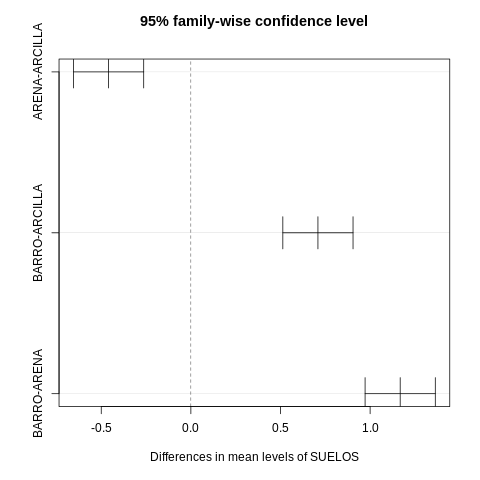

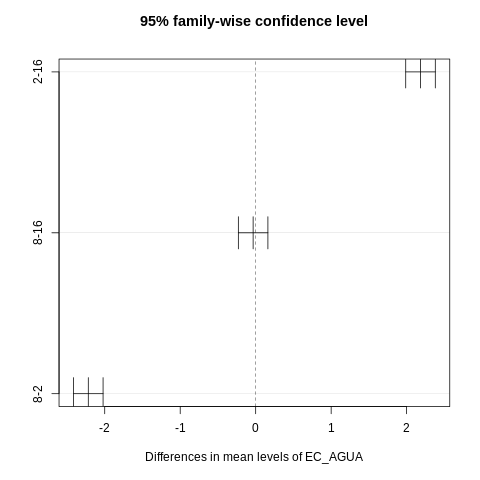

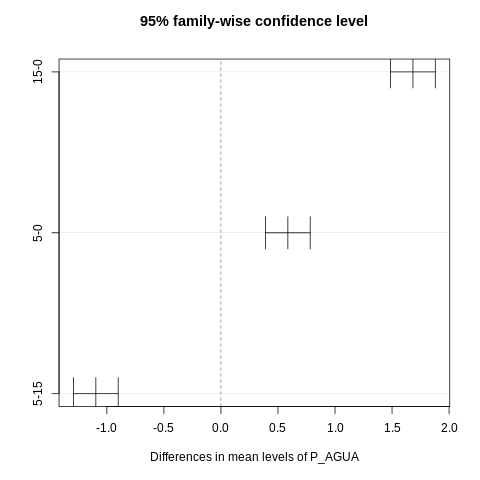

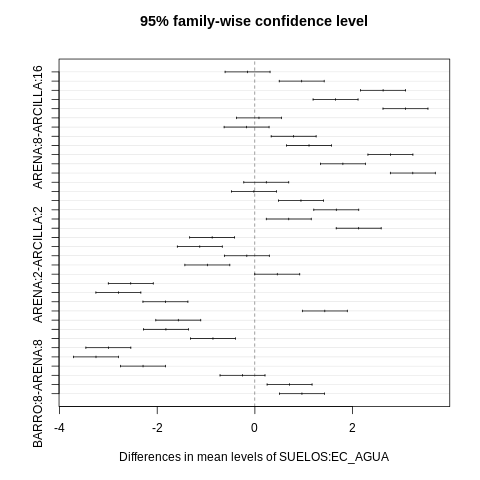

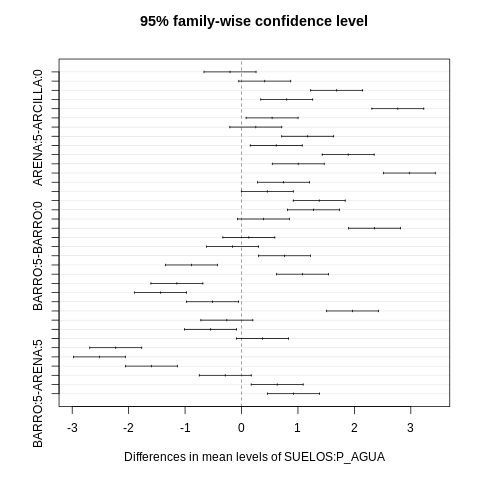

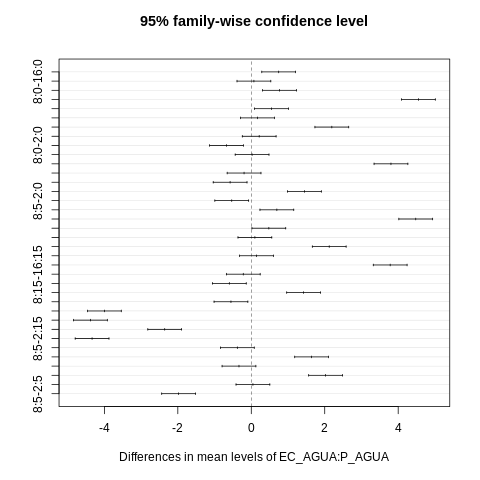

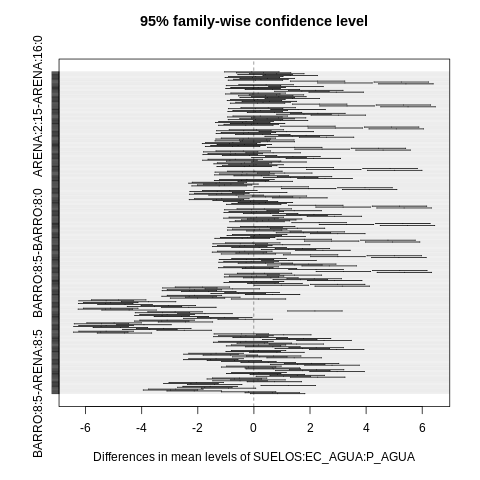

In [56]:
%%R
plot(TukeyHSD(h))

## **8. LSD - Comparaciones  Múltiples**

In [61]:
%%R
install.packages("agricolae")
library(agricolae)

### **a. Para Suelos**

In [59]:
%%R
LSD.test(anovaD3F,"SUELOS",console=TRUE)


Study: anovaD3F ~ "SUELOS"

LSD t Test for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means and individual ( 95 %) CI

        Electro_C      std  r         se       LCL       UCL  Min  Max    Q25
ARCILLA 1.1761111 1.677811 18 0.05584646 1.0615236 1.2906986 0.07 5.68 0.2375
ARENA   0.7172222 1.120577 18 0.05584646 0.6026348 0.8318097 0.05 3.47 0.0825
BARRO   1.8850000 1.596339 18 0.05584646 1.7704125 1.9995875 0.40 5.74 0.7350
          Q50    Q75
ARCILLA 0.375 0.9675
ARENA   0.155 0.5700
BARRO   1.275 2.6550

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

least Significant Difference: 0.1620512 

Treatments with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c



Study: anovaD3F ~ "SUELOS"

LSD t Test for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means and individual ( 95 %) CI

        Electro_C      std  r         se       LCL       UCL  Min  Max    Q25
ARCILLA 1.1761111 1.677811 18 0.05584646 1.0615236 1.2906986 0.07 5.68 0.2375
ARENA   0.7172222 1.120577 18 0.05584646 0.6026348 0.8318097 0.05 3.47 0.0825
BARRO   1.8850000 1.596339 18 0.05584646 1.7704125 1.9995875 0.40 5.74 0.7350
          Q50    Q75
ARCILLA 0.375 0.9675
ARENA   0.155 0.5700
BARRO   1.275 2.6550

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

least Significant Difference: 0.1620512 

Treatments with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


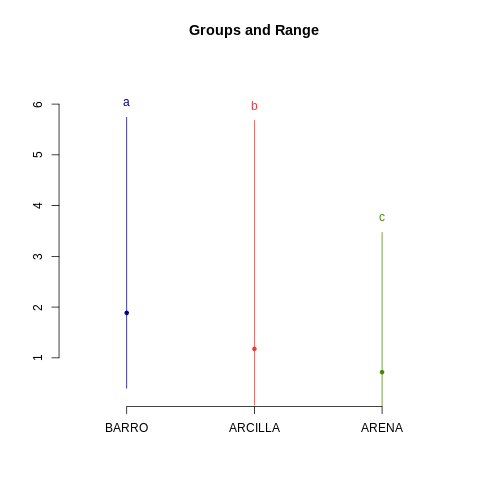

In [60]:
%%R
plot(LSD.test(anovaD3F,"SUELOS",console=TRUE))

### **b. LSD  Para Salinidad del Agua**

In [ ]:
%%R
LSD.test(anovaD3F,"EC_AGUA",console=TRUE)


Study: anovaD3F ~ "EC_AGUA"

LSD t Test for Electro_C 

Mean Square Error:  0.05613889 

EC_AGUA,  means and individual ( 95 %) CI

   Electro_C       std  r         se       LCL       UCL  Min  Max    Q25   Q50
16 0.5427778 0.7339563 18 0.05584646 0.4281903 0.6573652 0.06 2.87 0.1475 0.290
2  2.7266667 1.7634792 18 0.05584646 2.6120792 2.8412541 0.48 5.74 1.4025 2.345
8  0.5088889 0.5327386 18 0.05584646 0.3943014 0.6234764 0.05 2.10 0.1275 0.305
      Q75
16 0.5350
2  3.4300
8  0.7425

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

least Significant Difference: 0.1620512 

Treatments with the same letter are not significantly different.

   Electro_C groups
2  2.7266667      a
16 0.5427778      b
8  0.5088889      b



Study: anovaD3F ~ "EC_AGUA"

LSD t Test for Electro_C 

Mean Square Error:  0.05613889 

EC_AGUA,  means and individual ( 95 %) CI

   Electro_C       std  r         se       LCL       UCL  Min  Max    Q25   Q50
16 0.5427778 0.7339563 18 0.05584646 0.4281903 0.6573652 0.06 2.87 0.1475 0.290
2  2.7266667 1.7634792 18 0.05584646 2.6120792 2.8412541 0.48 5.74 1.4025 2.345
8  0.5088889 0.5327386 18 0.05584646 0.3943014 0.6234764 0.05 2.10 0.1275 0.305
      Q75
16 0.5350
2  3.4300
8  0.7425

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

least Significant Difference: 0.1620512 

Treatments with the same letter are not significantly different.

   Electro_C groups
2  2.7266667      a
16 0.5427778      b
8  0.5088889      b


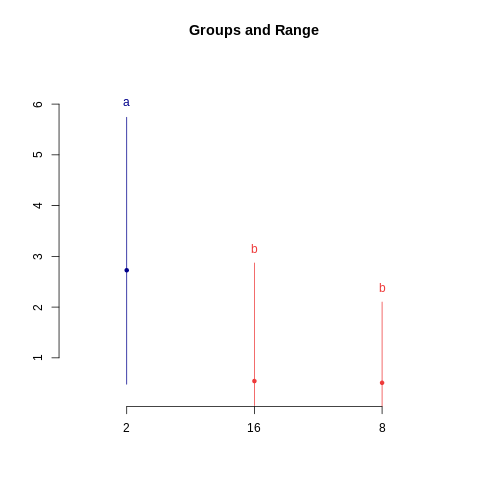

In [ ]:
%%R
plot(LSD.test(anovaD3F,"EC_AGUA",console=TRUE))

## **c. LSD Para Porcentaje de Agua**

In [ ]:
%%R
LSD.test(anovaD3F,"P_AGUA",console=TRUE)


Study: anovaD3F ~ "P_AGUA"

LSD t Test for Electro_C 

Mean Square Error:  0.05613889 

P_AGUA,  means and individual ( 95 %) CI

   Electro_C       std  r         se       LCL       UCL  Min  Max    Q25   Q50
0  0.5027778 0.4485507 18 0.05584646 0.3881903 0.6173652 0.05 1.50 0.1275 0.440
15 2.1861111 2.1166376 18 0.05584646 2.0715236 2.3006986 0.06 5.74 0.3625 1.565
5  1.0894444 1.0604853 18 0.05584646 0.9748570 1.2040319 0.08 3.31 0.2300 0.750
      Q75
0  0.6900
15 3.4275
5  1.9300

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

least Significant Difference: 0.1620512 

Treatments with the same letter are not significantly different.

   Electro_C groups
15 2.1861111      a
5  1.0894444      b
0  0.5027778      c



Study: anovaD3F ~ "P_AGUA"

LSD t Test for Electro_C 

Mean Square Error:  0.05613889 

P_AGUA,  means and individual ( 95 %) CI

   Electro_C       std  r         se       LCL       UCL  Min  Max    Q25   Q50
0  0.5027778 0.4485507 18 0.05584646 0.3881903 0.6173652 0.05 1.50 0.1275 0.440
15 2.1861111 2.1166376 18 0.05584646 2.0715236 2.3006986 0.06 5.74 0.3625 1.565
5  1.0894444 1.0604853 18 0.05584646 0.9748570 1.2040319 0.08 3.31 0.2300 0.750
      Q75
0  0.6900
15 3.4275
5  1.9300

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

least Significant Difference: 0.1620512 

Treatments with the same letter are not significantly different.

   Electro_C groups
15 2.1861111      a
5  1.0894444      b
0  0.5027778      c


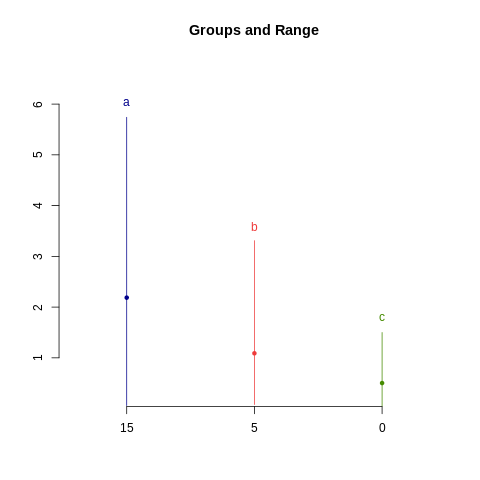

In [ ]:
%%R
plot(LSD.test(anovaD3F,"P_AGUA",console=TRUE))

## **9. HSD - Comparaciones Múltiples**

In [66]:
### **d. Variables que contiene nuestro modelo: usando names(g)**
%%R
names(D3F)

[1] "SUELOS"    "EC_AGUA"   "P_AGUA"    "Electro_C"


### **a. HSD para SUELOS - rangos múltiples**

In [68]:
%%R
HSD.test(anovaD3F,"SUELOS",console=TRUE)


Study: anovaD3F ~ "SUELOS"

HSD Test for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 
Critical Value of Studentized Range: 3.506426 

Minimun Significant Difference: 0.1958215 

Treatments with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


### **Gráficos: HSD para SUELOS - rangos múltiples**


Study: anovaD3F ~ "SUELOS"

HSD Test for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 
Critical Value of Studentized Range: 3.506426 

Minimun Significant Difference: 0.1958215 

Treatments with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


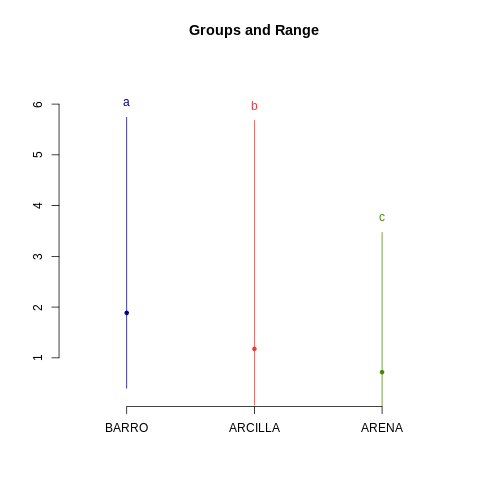

In [63]:
%%R
plot(HSD.test(anovaD3F,"SUELOS",console=TRUE))

### **b. HSD para EC_AGUA - rangos múltiples**

In [69]:
### **d. Variables que contiene nuestro modelo: usando names(g)**
%%R
names(D3F)

[1] "SUELOS"    "EC_AGUA"   "P_AGUA"    "Electro_C"


In [71]:
%%R
HSD.test(anovaD3F,"EC_AGUA",console=TRUE)


Study: anovaD3F ~ "EC_AGUA"

HSD Test for Electro_C 

Mean Square Error:  0.05613889 

EC_AGUA,  means

   Electro_C       std  r         se  Min  Max    Q25   Q50    Q75
16 0.5427778 0.7339563 18 0.05584646 0.06 2.87 0.1475 0.290 0.5350
2  2.7266667 1.7634792 18 0.05584646 0.48 5.74 1.4025 2.345 3.4300
8  0.5088889 0.5327386 18 0.05584646 0.05 2.10 0.1275 0.305 0.7425

Alpha: 0.05 ; DF Error: 27 
Critical Value of Studentized Range: 3.506426 

Minimun Significant Difference: 0.1958215 

Treatments with the same letter are not significantly different.

   Electro_C groups
2  2.7266667      a
16 0.5427778      b
8  0.5088889      b


### **Gráfico HSD para EC_AGUA - rangos múltiples**


Study: anovaD3F ~ "EC_AGUA"

HSD Test for Electro_C 

Mean Square Error:  0.05613889 

EC_AGUA,  means

   Electro_C       std  r         se  Min  Max    Q25   Q50    Q75
16 0.5427778 0.7339563 18 0.05584646 0.06 2.87 0.1475 0.290 0.5350
2  2.7266667 1.7634792 18 0.05584646 0.48 5.74 1.4025 2.345 3.4300
8  0.5088889 0.5327386 18 0.05584646 0.05 2.10 0.1275 0.305 0.7425

Alpha: 0.05 ; DF Error: 27 
Critical Value of Studentized Range: 3.506426 

Minimun Significant Difference: 0.1958215 

Treatments with the same letter are not significantly different.

   Electro_C groups
2  2.7266667      a
16 0.5427778      b
8  0.5088889      b


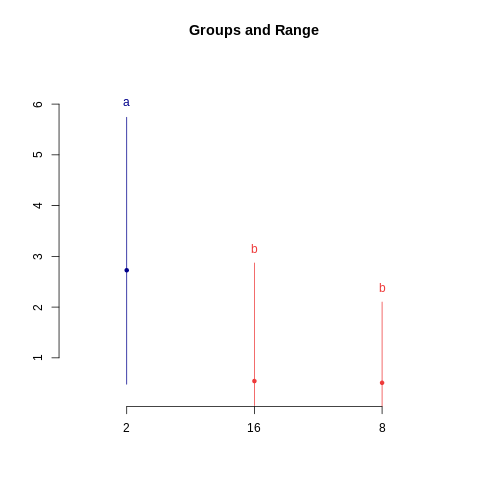

In [73]:
%%R
plot(HSD.test(anovaD3F,"EC_AGUA",console=TRUE))

### **c. HSD para P_AGUA - rangos múltiples**

In [74]:
%%R
HSD.test(anovaD3F,"P_AGUA",console=TRUE)


Study: anovaD3F ~ "P_AGUA"

HSD Test for Electro_C 

Mean Square Error:  0.05613889 

P_AGUA,  means

   Electro_C       std  r         se  Min  Max    Q25   Q50    Q75
0  0.5027778 0.4485507 18 0.05584646 0.05 1.50 0.1275 0.440 0.6900
15 2.1861111 2.1166376 18 0.05584646 0.06 5.74 0.3625 1.565 3.4275
5  1.0894444 1.0604853 18 0.05584646 0.08 3.31 0.2300 0.750 1.9300

Alpha: 0.05 ; DF Error: 27 
Critical Value of Studentized Range: 3.506426 

Minimun Significant Difference: 0.1958215 

Treatments with the same letter are not significantly different.

   Electro_C groups
15 2.1861111      a
5  1.0894444      b
0  0.5027778      c


### **Gráficos: HSD para P_AGUA - rangos múltiples**


Study: anovaD3F ~ "P_AGUA"

HSD Test for Electro_C 

Mean Square Error:  0.05613889 

P_AGUA,  means

   Electro_C       std  r         se  Min  Max    Q25   Q50    Q75
0  0.5027778 0.4485507 18 0.05584646 0.05 1.50 0.1275 0.440 0.6900
15 2.1861111 2.1166376 18 0.05584646 0.06 5.74 0.3625 1.565 3.4275
5  1.0894444 1.0604853 18 0.05584646 0.08 3.31 0.2300 0.750 1.9300

Alpha: 0.05 ; DF Error: 27 
Critical Value of Studentized Range: 3.506426 

Minimun Significant Difference: 0.1958215 

Treatments with the same letter are not significantly different.

   Electro_C groups
15 2.1861111      a
5  1.0894444      b
0  0.5027778      c


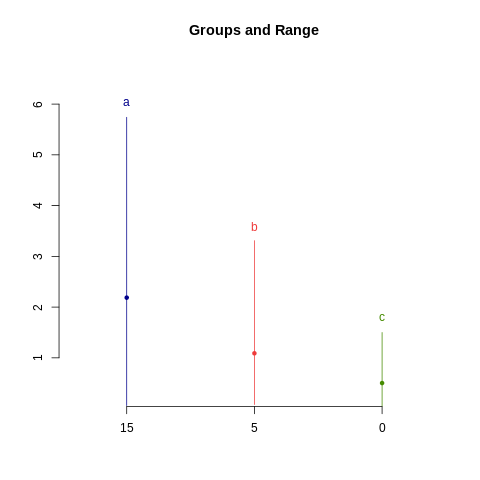

In [75]:
%%R
plot(HSD.test(anovaD3F,"P_AGUA",console=TRUE))

## **d. Prueba de Student-Newman-Keuls (SNK)**

In [76]:
## **c. Prueba de Student-Newman-Keuls (SNK)**
%%R
SNK.test(anovaD3F,"SUELOS",console=TRUE)


Study: anovaD3F ~ "SUELOS"

Student Newman Keuls Test
for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 

Critical Range
        2         3 
0.1620512 0.1958215 

Means with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


## **Grafico: Prueba de Student-Newman-Keuls (SNK)**


Study: anovaD3F ~ "SUELOS"

Student Newman Keuls Test
for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 

Critical Range
        2         3 
0.1620512 0.1958215 

Means with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


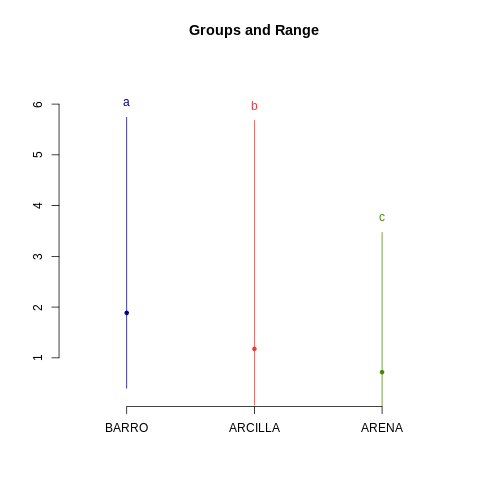

In [77]:
#Prueba de Student-Newman-Keuls (SNK)
%%R
plot(SNK.test(anovaD3F,"SUELOS",console=TRUE))

## **e. Prueba Prueba de Scheffé**

In [78]:
# Prueba de Scheffé
%%R
scheffe.test(anovaD3F,"SUELOS",console=TRUE)


Study: anovaD3F ~ "SUELOS"

Scheffe Test for Electro_C 

Mean Square Error  : 0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 
Critical Value of F: 3.354131 

Minimum Significant Difference: 0.2045576 

Means with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


## **Gráfico Prueba Prueba de Scheffé**


Study: anovaD3F ~ "SUELOS"

Scheffe Test for Electro_C 

Mean Square Error  : 0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 
Critical Value of F: 3.354131 

Minimum Significant Difference: 0.2045576 

Means with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


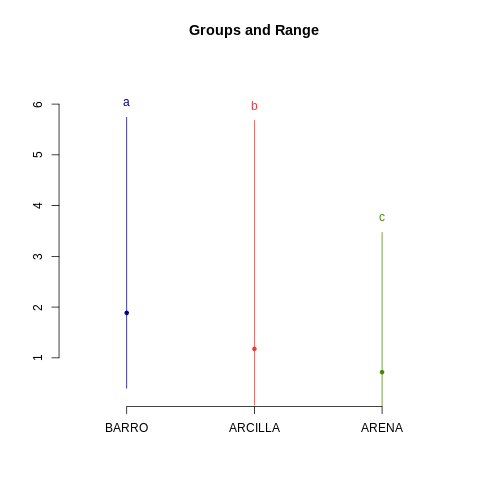

In [79]:
# Prueba de Scheffé
%%R
plot(scheffe.test(anovaD3F,"SUELOS",console=TRUE))

## **f. Prueba Prueba de Duncan**

In [80]:
#(j) Prueba de Duncan
%%R
duncan.test(anovaD3F,"SUELOS",console=TRUE)


Study: anovaD3F ~ "SUELOS"

Duncan's new multiple range test
for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 

Critical Range
        2         3 
0.1620512 0.1702570 

Means with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


## **Gráfico Prueba Prueba de Duncan**


Study: anovaD3F ~ "SUELOS"

Duncan's new multiple range test
for Electro_C 

Mean Square Error:  0.05613889 

SUELOS,  means

        Electro_C      std  r         se  Min  Max    Q25   Q50    Q75
ARCILLA 1.1761111 1.677811 18 0.05584646 0.07 5.68 0.2375 0.375 0.9675
ARENA   0.7172222 1.120577 18 0.05584646 0.05 3.47 0.0825 0.155 0.5700
BARRO   1.8850000 1.596339 18 0.05584646 0.40 5.74 0.7350 1.275 2.6550

Alpha: 0.05 ; DF Error: 27 

Critical Range
        2         3 
0.1620512 0.1702570 

Means with the same letter are not significantly different.

        Electro_C groups
BARRO   1.8850000      a
ARCILLA 1.1761111      b
ARENA   0.7172222      c


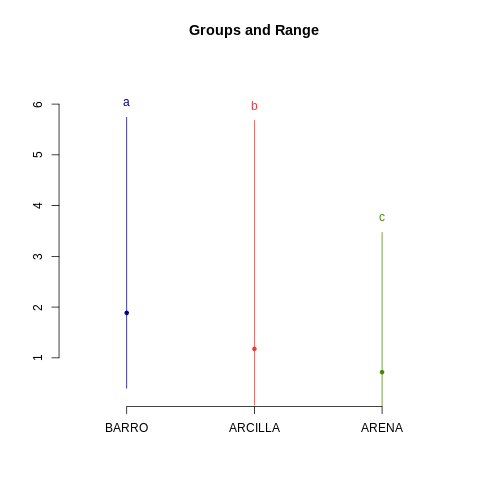

In [81]:
#(j) Prueba de Duncan
%%R
plot(duncan.test(anovaD3F,"SUELOS",console=TRUE))

# **10. Los residuos**

In [93]:
%%R
names(anovaD3F)

 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "contrasts"     "xlevels"       "call"          "terms"        
[13] "model"        


### **a. Boxplot - Residuales**

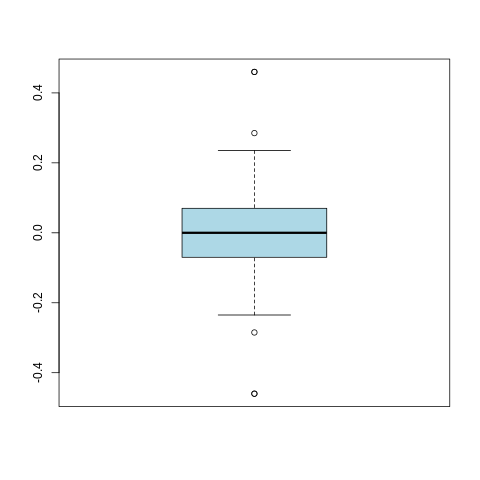

In [ ]:
%%R
boxplot(anovaD3F$res, col = 'lightblue')

### **b. Histograma de Residuos - Grafica de Normalidad**

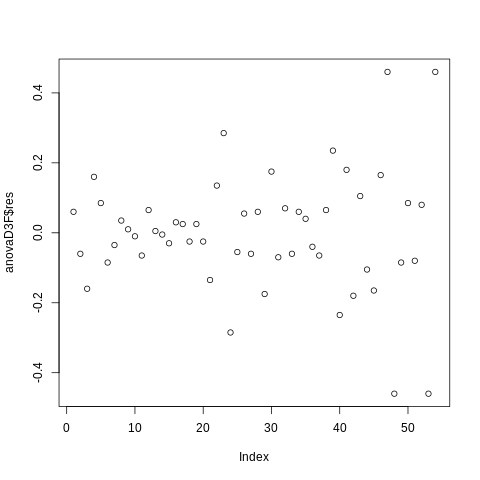

In [87]:
%%R
plot(anovaD3F$res)

In [88]:
%%R
sd(anovaD3F$res)
summary(anovaD3F$res)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.46000 -0.06875  0.00000  0.00000  0.06875  0.46000 


In [89]:
%%R
sd(anovaD3F$res)

[1] 0.1691126


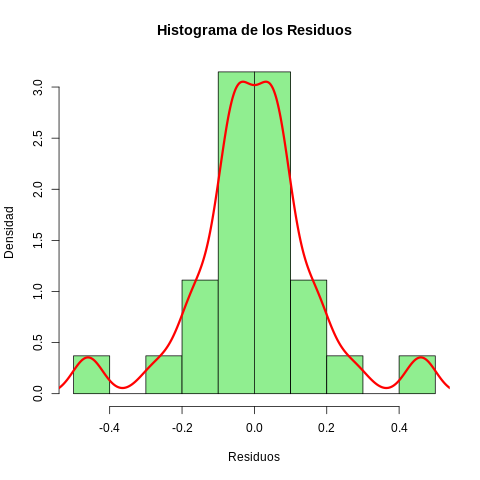

In [85]:
%%R
#(d) Supuesto del modelo:Normalidad de los residuos
hist(anovaD3F$residuals, col="lightgreen", main = "Histograma de los Residuos",
     freq = F, xlab="Residuos",ylab="Densidad")
lines(density(anovaD3F$residuals), col="red", lwd=3)

## **c. Normalidad con Shapiro Wilks**

In [86]:
# **Prueba de Shapiro Wilks**

%%R
shapiro.test(anovaD3F$res)


	Shapiro-Wilk normality test

data:  anovaD3F$res
W = 0.94361, p-value = 0.01322



## **d. Prueba de Normalidad con Q-Q Plot**

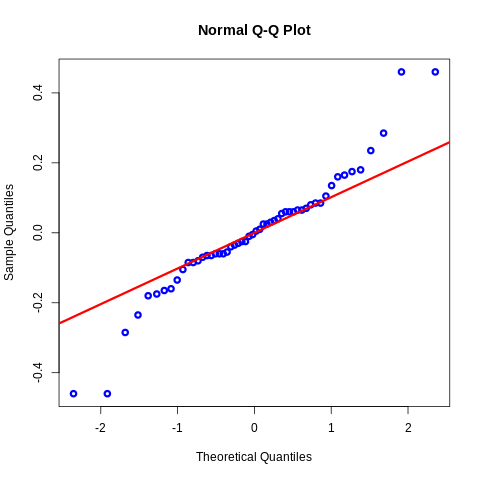

In [90]:
# ** Prueba de Normalidad con Q-Q Plot**
%%R
qqnorm(anovaD3F$residuals,col="blue", lwd=3)
qqline(anovaD3F$residuals,col="red", lwd=3)


## **e. Supuesto de Independencia**

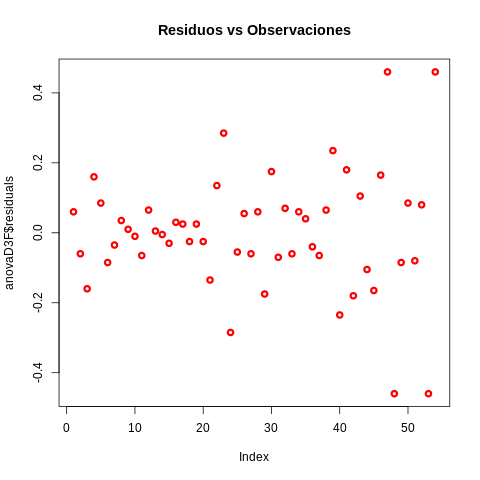

In [91]:
## **e. Supuesto de Independencia**
%%R

plot(anovaD3F$residuals,main = "Residuos vs Observaciones",col="red", lwd=3)

## **(f) Homocedasticidad - Prueba de Bartlett**

In [92]:
## **(f) Homocedasticidad**
%%R
bartlett.test(Electro_C~SUELOS)
#boxplot(anovaDBCA1$residuals~Bloques, xlab="Bloques",ylab="Residuos",
       # col = c("yellow", "blue", "white","green", "red"))


	Bartlett test of homogeneity of variances

data:  Electro_C by SUELOS
Bartlett's K-squared = 2.9145, df = 2, p-value = 0.2329



## **11. Homocedasticidad - Residuales vs Factores**

In [ ]:
%%R
names(D3F)

[1] "SUELOS"    "EC_AGUA"   "P_AGUA"    "Electro_C"


## **a. Homocedasticidad - Residuales vs Tipos de Suelos**

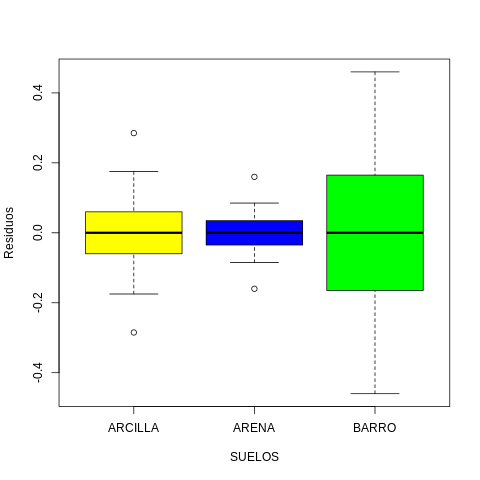

In [ ]:
#(a) Homocedasticidad
%%R
boxplot(anovaD3F$residuals~D3F$SUELOS, xlab="SUELOS",ylab="Residuos",
       col = c("yellow", "blue", "green"))

## **b. Homocedasticidad - Residuales vs Tipos de Salinidad**

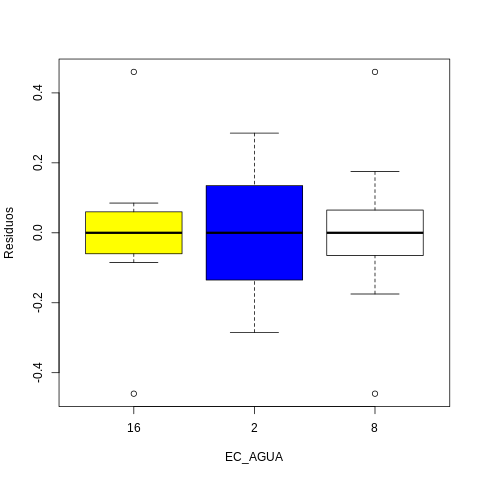

In [94]:
#(a) Homocedasticidad
%%R
boxplot(anovaD3F$residuals~D3F$EC_AGUA, xlab="EC_AGUA",ylab="Residuos",
       col = c("yellow", "blue", "white"))

## **c. Homocedasticidad - Residuales vs Tipos de Porcentajes de agua**

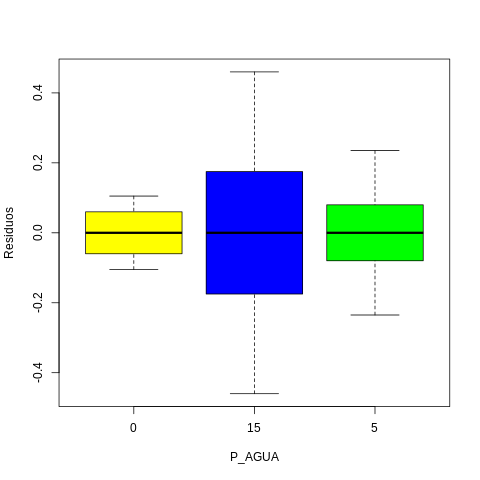

In [95]:
#(a) Homocedasticidad
%%R
boxplot(anovaD3F$residuals~D3F$P_AGUA, xlab="P_AGUA",ylab="Residuos",
       col = c("yellow", "blue", "green"))

# **12. Pasar de DataFrame a dataframe**

In [2]:
# Importa las librerías necesarias
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

# Activa la conversión automática entre R y pandas
pandas2ri.activate()

# Ejecuta el código en R
ro.r('''
Electro_C <- c(0.60,0.48,1.69,2.01,3.47,3.30,0.05,0.12,0.11,0.09,0.06,0.19,
0.07,0.06,0.08,0.14,0.22,0.17,0.98,0.93,2.21,2.48,5.68,5.11,0.15,0.26,
0.23,0.35,0.40,0.75,0.07,0.21,0.23,0.35,0.43,0.35,1.37,1.50,3.31,2.84,5.74,
5.38,0.72,0.51,0.78,1.11,2.10,1.18,0.40,0.57,0.72,0.88,1.95,2.87)
SUELOS <- factor(c(rep("ARENA",18),
                rep("ARCILLA",18),
                rep("BARRO",18)))
EC_AGUA <- factor(c(rep("2",6),
                    rep("8",6),
                    rep("16",6)))
P_AGUA <- factor(c(rep("0",2),
                    rep("5",2),
                    rep("15",2)))

df <- data.frame(SUELOS, EC_AGUA, P_AGUA,Electro_C)
''')

# Convierte el dataframe de R a pandas
df = ro.r('df')

# Mostrar el dataframe en Python
print(df)


     SUELOS EC_AGUA P_AGUA  Electro_C
1     ARENA       2      0       0.60
2     ARENA       2      0       0.48
3     ARENA       2      5       1.69
4     ARENA       2      5       2.01
5     ARENA       2     15       3.47
6     ARENA       2     15       3.30
7     ARENA       8      0       0.05
8     ARENA       8      0       0.12
9     ARENA       8      5       0.11
10    ARENA       8      5       0.09
11    ARENA       8     15       0.06
12    ARENA       8     15       0.19
13    ARENA      16      0       0.07
14    ARENA      16      0       0.06
15    ARENA      16      5       0.08
16    ARENA      16      5       0.14
17    ARENA      16     15       0.22
18    ARENA      16     15       0.17
19  ARCILLA       2      0       0.98
20  ARCILLA       2      0       0.93
21  ARCILLA       2      5       2.21
22  ARCILLA       2      5       2.48
23  ARCILLA       2     15       5.68
24  ARCILLA       2     15       5.11
25  ARCILLA       8      0       0.15
26  ARCILLA 

In [3]:
import pandas as pd

# Datos
data = {
    'SUELOS': ['ARENA'] * 18 + ['ARCILLA'] * 18 + ['BARRO'] * 18,
    'EC_AGUA': ['2'] * 6 + ['8'] * 6 + ['16'] * 6 +
               ['2'] * 6 + ['8'] * 6 + ['16'] * 6 +
               ['2'] * 6 + ['8'] * 6 + ['16'] * 6,
    'P_AGUA': ['0', '0', '5', '5', '15', '15'] * 9,
    'Electro_C': [
        0.60, 0.48, 1.69, 2.01, 3.47, 3.30, 0.05, 0.12, 0.11, 0.09, 0.06, 0.19,
        0.07, 0.06, 0.08, 0.14, 0.22, 0.17, 0.98, 0.93, 2.21, 2.48, 5.68, 5.11,
        0.15, 0.26, 0.23, 0.35, 0.40, 0.75, 0.07, 0.21, 0.23, 0.35, 0.43, 0.35,
        1.37, 1.50, 3.31, 2.84, 5.74, 5.38, 0.72, 0.51, 0.78, 1.11, 2.10, 1.18,
        0.40, 0.57, 0.72, 0.88, 1.95, 2.87
    ]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df)


     SUELOS EC_AGUA P_AGUA  Electro_C
0     ARENA       2      0       0.60
1     ARENA       2      0       0.48
2     ARENA       2      5       1.69
3     ARENA       2      5       2.01
4     ARENA       2     15       3.47
5     ARENA       2     15       3.30
6     ARENA       8      0       0.05
7     ARENA       8      0       0.12
8     ARENA       8      5       0.11
9     ARENA       8      5       0.09
10    ARENA       8     15       0.06
11    ARENA       8     15       0.19
12    ARENA      16      0       0.07
13    ARENA      16      0       0.06
14    ARENA      16      5       0.08
15    ARENA      16      5       0.14
16    ARENA      16     15       0.22
17    ARENA      16     15       0.17
18  ARCILLA       2      0       0.98
19  ARCILLA       2      0       0.93
20  ARCILLA       2      5       2.21
21  ARCILLA       2      5       2.48
22  ARCILLA       2     15       5.68
23  ARCILLA       2     15       5.11
24  ARCILLA       8      0       0.15
25  ARCILLA 